In [40]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
words = open('names.txt', 'r').read().splitlines()
print(len(words))

32033


In [42]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [62]:
block_size = 3
X, Y = [], []
for w in words:
	context = [0] * block_size
	for ch in w+'.':
		ix = stoi[ch]
		X.append(context)
		Y.append(ix)
		context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [97]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [164]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30,200), generator=g)
W2 = torch.randn((200,27), generator=g)
b1 = torch.randn(200, generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [165]:
sum(p.nelement() for p in parameters)

11897

In [166]:
for p in parameters:
	p.requires_grad = True

In [167]:
lre = torch.linspace(-3,0,30000)
lrs = 10**lre

In [168]:
lri = []
lossi = []
stepi = []

In [175]:

for i in range(50000):
	# forward pass
	# minibatch
	ix = torch.randint(0, Xtr.shape[0], (32,))
	emb = C[Xtr[ix]]
	h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
	logits = h @ W2 + b2
	loss = F.cross_entropy(logits, Ytr[ix])
	# backward pass
	for p in parameters:
		p.grad = None
	loss.backward()
	# update
	lr = 0.01
	for p in parameters:
		p.data += -lr * p.grad
	lri.append(lr)
	stepi.append(i)
	lossi.append(loss.log10().item())


print(loss.item())

2.098822832107544


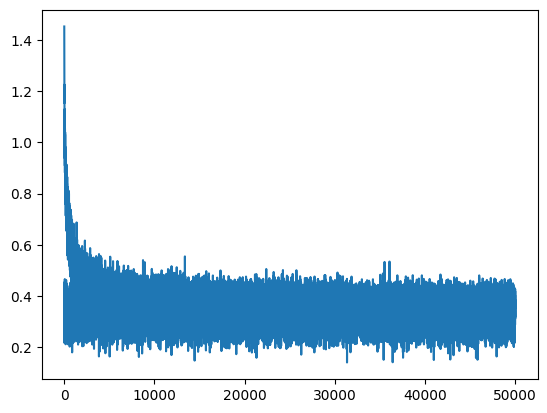

In [176]:
plt.plot(stepi, lossi)

In [156]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

def build_dataset(words):
	block_size = 3
	X, Y = [], []
	for w in words:
		context = [0] * block_size
		for ch in w+'.':
			ix = stoi[ch]
			X.append(context)
			Y.append(ix)
			context = context[1:] + [ix]
	X = torch.tensor(X)
	Y = torch.tensor(Y)
	print(X.shape, Y.shape)
	return X, Y
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     # 80%
Xdev, Ydev = build_dataset(words[n1:n2])   # 10%
Xte, Yte = build_dataset(words[n2:])				# 10%


torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [177]:
# evaluvate
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.2175838947296143


In [178]:
emb = C[Xte]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yte)
print(loss.item())

2.2158312797546387


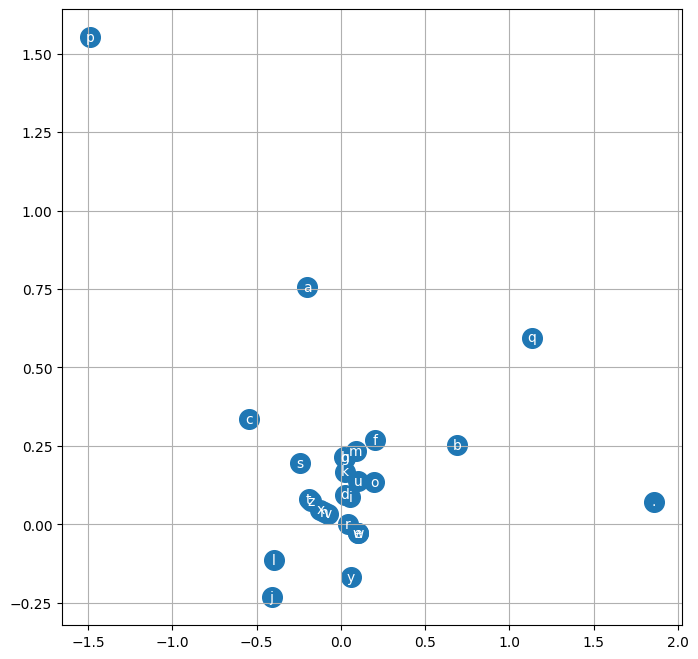

In [179]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
	plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')
plt.grid()

In [185]:
# sample from the model
g = torch.Generator().manual_seed(2147483647)
for _ in range(20):
	out = []
	context = [0]*block_size
	while True:
		emb = C[torch.tensor([context])]
		h = torch.tanh(emb.view(1,-1) @ W1 + b1)
		logits = h @ W2 + b2
		probs = F.softmax(logits, 1)
		ix = torch.multinomial(probs, num_samples=1, generator=g).item()
		context = context[1:] + [ix]
		out.append(ix)
		if ix == 0:
			break
	print(''.join([itos[o] for o in out]))

junide.
jakasar.
pres.
azaina.
kohin.
tolda.
saree.
kalinaanyanilena.
jodedainrwie.
adse.
ainayla.
terinleem.
kyfontus.
maryas.
jah.
jaylyn.
raan.
ezon.
kaelandreedamiii.
wynin.


alcokjgdjtsoygdallmsdvbktmrdtltkaziakalscmjgrkrszaawcgwjchstrdjmskhdcalmekesmlmddktkkjabkahjazsabcadvdjtacgsjajdkdijjeatapnssegghkhsckhkjdmaymdmrbokmklujitadjrjlsaklczmbkmacajzrabhgyykxaomdfgrmtkjsjoddretyadclyskmkkrmsajayacdgksdanagakjkrareakkajmjzslptaskkdnadaasmyrnvzcsjvgelkkajhirznjmllslejdcbajhcpkjakdbcmmzlljhwaaedsjahcatejmbkjscmseahedclyacjasgaaasemesaecdjcrbjjjtkksaonjzcnabbmjjtpbckmdkrkksjmazmaajgjcablrktmtdakmonelslevzgjcmmtjbzsaaikslmklasktbtjkankmvmmkamcjmatcejgvrzmlkzbedmzttkjdkaabkobajzkcharmzechxczjdjmgltahbmnasaaigejscpbaeaalkccwkazarrgkttakmzshbnadjagvakrijadakvtkzlkrbkkdeclaaakhbkdzkllskwdbrtjaaeykcjyenbandteecaarkfbikavskjvzprmaenakjctamarapfcthsddcncjhtmktoaepbajatjcdbnzaziazvjapcaajnjlbzccprpehlihbcastajsndslsmgvsegkyrejksaakadcjcjantpbnalcjanosjprzbezdjlateikkaajajerdndcbrraejbsvajeaaaeaeaosmppztdmtzziacstikpaasrdklkmakkajmtzrkdmjvadllcjkctmahlkceegdmitbmnbzljavtrmeskimjlajjkesjzcmkahnndjalajefxnjrkwteajjtsbralazktakzsaatsacajaphaainkaneztharznjaaykksapkflmdmcskld